In [4]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('fivethirtyeight')

# get the data

In [5]:
df = pd.read_excel('9.14.2017 impact analysis.xlsx',index_col='date_requested',\
                  parse_dates=['date_requested','date_completed'])
df = df[['wo_id','date_completed','prob_type']]
df['duration'] = df.date_completed - df.index
df['fiscal_year'] = np.where(df.index.month >= 7,df.index.year+1, df.index.year)
df.sort_index(inplace=True)

In [37]:
print('Annual Work Order Volume:')
work_order_volume = []
for year in df.fiscal_year.unique():
    print(year, df.loc[(df.fiscal_year==year) & (df.prob_type != 'TEST(DO NOT USE)')].wo_id.count())

Annual Work Order Volume:
2014 12209
2015 14521
2016 16668
2017 17193
2018 3338


# filter to get only work orders requested in that fiscal year and exclude all 'test' work orders

In [38]:
fy_list = []
fy_dfs = []
for year in df.fiscal_year.unique():
    fy_dfs.append(df.loc[(df.fiscal_year==year) &\
                    (df.prob_type != 'TEST(DO NOT USE)')])
    fy_list.append(year)
fy_dfs = dict(zip(fy_list,fy_dfs))

# set the hvac filters 

In [39]:
cm_prob_types = ['BOILER','CHILLERS','COOLING TOWERS',\
                 'HVAC','HVAC INFRASTRUCTURE','HVAC|REPAIR']
pm_prob_types = ['PREVENTIVE MAINT','HVAC|PM']
hvac_prob_types = cm_prob_types+pm_prob_types

# add column for count of each problem type for each year to later see volumes in all pm or all cm or in the work order categories that constitute these groupings

In [40]:
for year in df.fiscal_year.unique():
    fy_dfs[year]['count'] = fy_dfs[year].groupby(['prob_type'])['prob_type'].transform('count')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# get and store the pm:cm kpi for each year

In [41]:
pm_cm_kpi = []
for key,value in fy_dfs.items():
    pm_cm_kpi.append(fy_dfs[key][fy_dfs[key].prob_type.isin(pm_prob_types)].\
          prob_type.value_counts().sum() /\
          fy_dfs[key][fy_dfs[key].prob_type.isin(cm_prob_types)].\
                     prob_type.value_counts().sum()*100)

pm_cm_kpi = dict(zip(fy_list,pm_cm_kpi))
pm_cm_kpi

{2014: 0.0,
 2015: 4.7688564476885649,
 2016: 46.938775510204081,
 2017: 58.189845474613691,
 2018: 78.733031674208149}

# briefly visualize

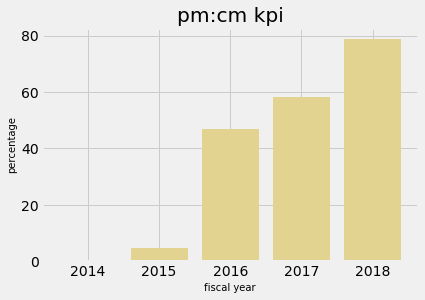

In [43]:
plt.bar(range(len(pm_cm_kpi)),list(pm_cm_kpi.values()),color='#e2d391')
plt.xticks(range(len(pm_cm_kpi)),list(pm_cm_kpi.keys()))
plt.title('pm:cm kpi')
plt.xlabel('fiscal year',fontsize=10)
plt.ylabel('percentage', fontsize=10);